In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import set 
from matplotlib.pyplot import figure, show

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Train_UWu5bXk.csv")
test = pd.read_csv("Test_u94Q5KV.csv")
sample = pd.read_csv("SampleSubmission_TmnO39y.csv")

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

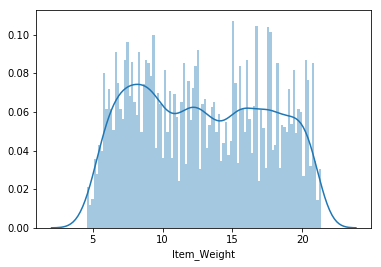

In [6]:
sns.distplot(train["Item_Weight"].dropna(),bins=100)

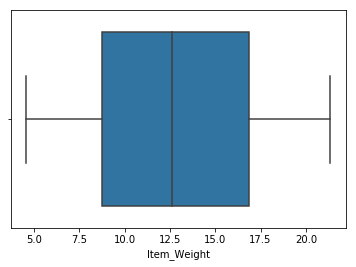

In [7]:
sns.boxplot(x="Item_Weight",data=train)

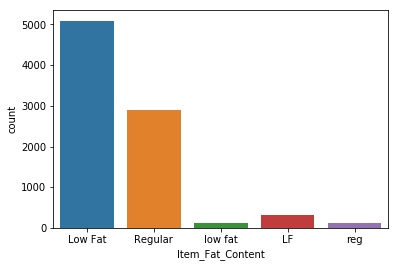

In [8]:
sns.countplot(x="Item_Fat_Content",data=train)

In [102]:
train['Item_Fat_Content']=train['Item_Fat_Content'].apply(lambda x:0 if (x=='Regular' or x=='reg') else 1)
test["Item_Fat_Content"] = test["Item_Fat_Content"].apply(lambda x:0 if (x == "Regular" or x =='reg') else 1)

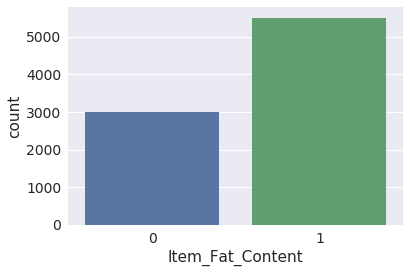

In [103]:
sns.countplot(train["Item_Fat_Content"])

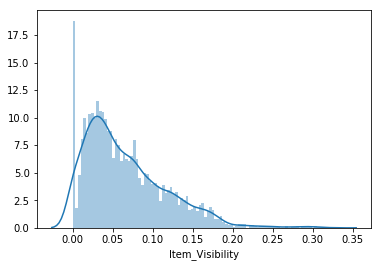

In [9]:
sns.distplot(train["Item_Visibility"],bins=100)

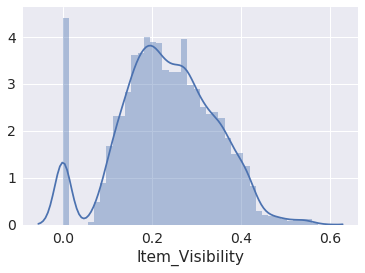

In [100]:
sns.distplot(np.sqrt(train['Item_Visibility'].dropna()))

In [101]:
train['Item_Visibility']=train['Item_Visibility'].apply(lambda x:np.sqrt(x))
test['Item_Visibility']=test['Item_Visibility'].apply(lambda x:np.sqrt(x))

In [10]:
count = 0 
for i in range(train["Item_Type"].shape[0]):
    data = train["Item_Type"].iloc[i]
    if data == "Dairy":
        count += 1


In [11]:
count

682

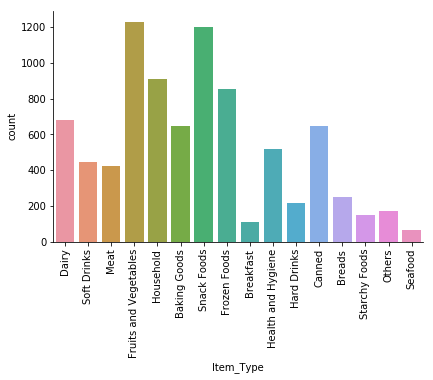

In [12]:
g = sns.factorplot(x="Item_Type",data=train, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

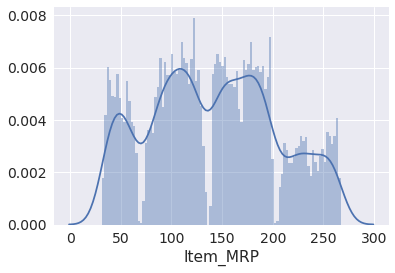

In [108]:
sns.distplot(train["Item_MRP"],bins=100)

In [109]:
train['actual_MRP']=train['Item_MRP']
test['actual_MRP']=test['Item_MRP']

In [111]:
train['priceband'] = pd.qcut(train['Item_MRP'],4)
train[['priceband', 'Item_Outlet_Sales']].\
groupby(['priceband'], as_index=False).mean().\
sort_values(by='priceband', ascending=True)

,priceband,Item_Outlet_Sales
0,"(31.288999999999998, 93.826]",948.780309
1,"(93.826, 143.013]",1757.214603
2,"(143.013, 185.644]",2576.221513
3,"(185.644, 266.888]",3443.124556


In [113]:
combine=[train,test]
for dataset in combine:
    dataset.loc[ dataset['Item_MRP'] <=93.826, 'Item_MRP'] = 0
    dataset.loc[(dataset['Item_MRP'] >93.826) & (dataset['Item_MRP'] <= 143.013), 'Item_MRP'] = 1
    dataset.loc[(dataset['Item_MRP'] >143.013) & (dataset['Item_MRP'] <= 185.644), 'Item_MRP'] = 2
    dataset.loc[ dataset['Item_MRP'] > 185.644, 'Item_MRP'] = 3
    dataset['Item_MRP'] = dataset['Item_MRP'].astype(int)


In [114]:
train= train.drop(['priceband'], axis=1)
    
train.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id,actual_weight,actual_MRP
0,0,1,0.126678,Dairy,3,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,9.300000,249.8092
1,0,0,0.138846,Soft Drinks,0,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,5.920000,48.2692
2,2,1,0.129461,Meat,1,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,17.500000,141.6180
3,2,0,0.000000,Fruits and Vegetables,2,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,19.200000,182.0950
4,0,1,0.000000,Household,0,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,8.930000,53.8614
5,0,0,0.000000,Baking Goods,0,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD,10.395000,51.4008
6,1,0,0.112876,Snack Foods,0,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,FD,13.650000,57.6588
7,1,1,0.357029,Snack Foods,1,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FD,12.857645,107.7622
8,2,0,0.129179,Frozen Foods,1,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,FD,16.200000,96.9726
9,2,0,0.307327,Frozen Foods,3,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,FD,19.200000,187.8214


In [105]:
# set(train["Outlet_Identifier"])
train["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

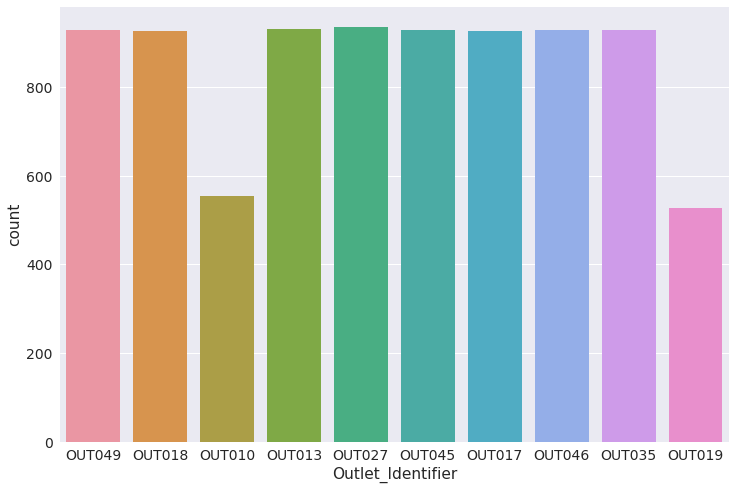

In [29]:
# set(font_scale=1.4)
fig = figure(figsize=(12,8))
sns.countplot(x="Outlet_Identifier",data=train)

In [115]:
train["Outlet_Identifier"] = train["Outlet_Identifier"].apply(lambda x:x[-2:])
test["Outlet_Identifier"] = test["Outlet_Identifier"].apply(lambda x:x[-2:])

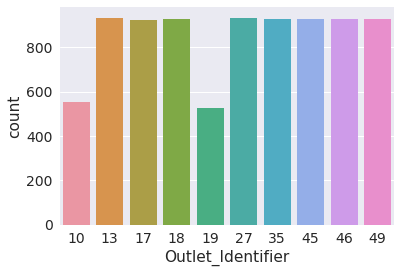

In [116]:
sns.countplot(train["Outlet_Identifier"])

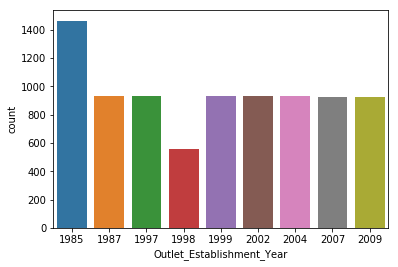

In [16]:
sns.countplot(x="Outlet_Establishment_Year",data=train)

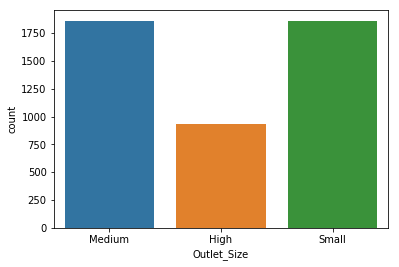

In [17]:
sns.countplot(x="Outlet_Size",data=train.dropna())

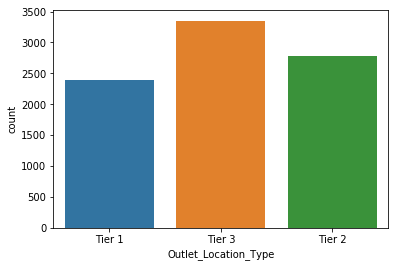

In [18]:
sns.countplot(x="Outlet_Location_Type",data=train)

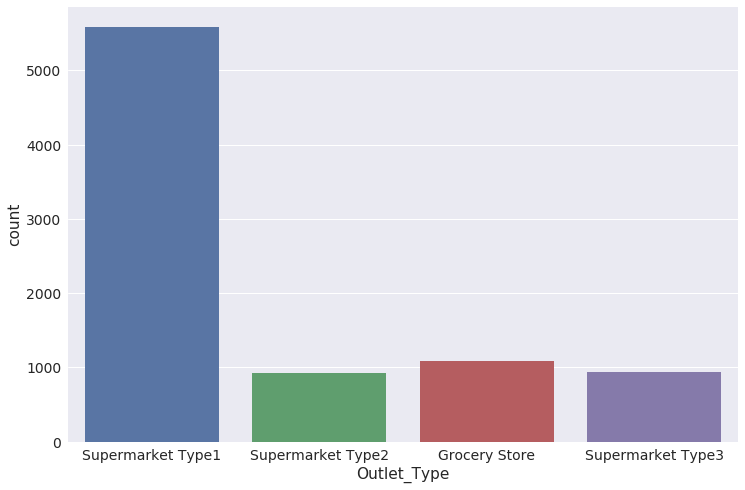

In [28]:
set(font_scale=1.4)
fig = figure(figsize=(12,8))
sns.countplot(x="Outlet_Type",data=train)

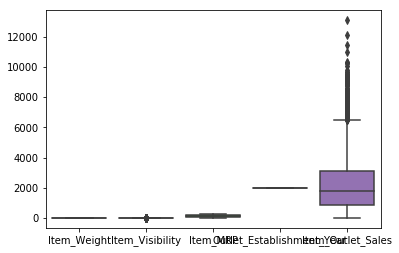

In [20]:
sns.boxplot(data=train)

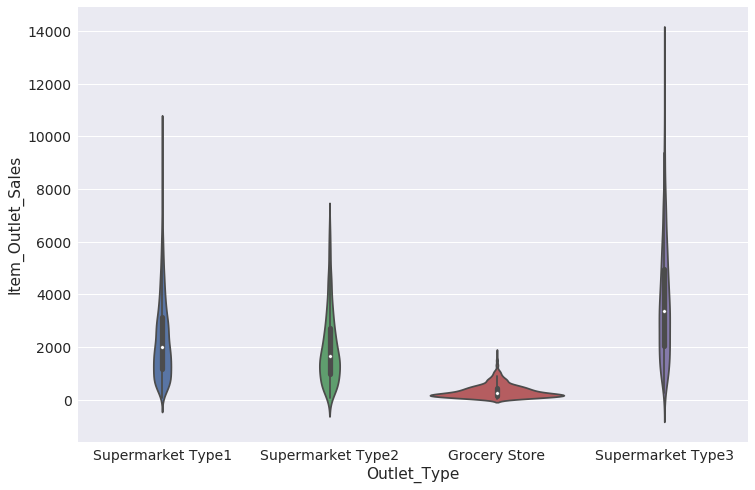

In [72]:
fig = figure(figsize=(12,8))
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)

In [58]:
missing_data = train.isnull().sum(axis=0).reset_index()
missing_data.columns =  ['column_name', 'missing_count']
missing_data = missing_data[missing_data["missing_count"]>0]
missing_data = missing_data.sort_values(by="missing_count")
missing_data["percent"] = missing_data["missing_count"]/train.shape[0]*100
missing_data

,column_name,missing_count,percent
1,Item_Weight,1463,17.165317
8,Outlet_Size,2410,28.276428


In [59]:
missing_data = test.isnull().sum(axis=0).reset_index()
missing_data.columns =  ['column_name', 'missing_count']
missing_data = missing_data[missing_data["missing_count"]>0]
missing_data = missing_data.sort_values(by="missing_count")
missing_data["percent"] = missing_data["missing_count"]/test.shape[0]*100
missing_data

,column_name,missing_count,percent
1,Item_Weight,976,17.180074
8,Outlet_Size,1606,28.269671


In [62]:
train["Item_Identifier"].nunique()

1559

In [65]:
train["Item_Id"] = train["Item_Identifier"].apply(lambda x:x[:2])

In [66]:
test["Item_Id"] = test["Item_Identifier"].apply(lambda x:x[:2])


In [67]:
train.drop(['Item_Identifier'],axis=1,inplace=True)
test.drop(['Item_Identifier'],axis=1,inplace=True)


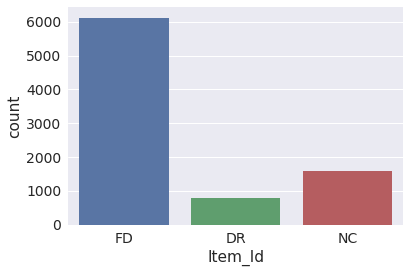

In [68]:
sns.countplot(train['Item_Id'])


In [69]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

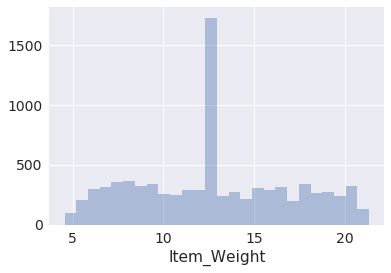

In [76]:

sns.distplot(train['Item_Weight'].dropna(),kde=False)

In [77]:
train['Item_Weight'].mean()

12.857645184136409

In [78]:
train['actual_weight']=train['Item_Weight']
test['actual_weight']=test['Item_Weight']

In [85]:
train['weightband'] = pd.qcut(train['Item_Weight'], 3)


In [89]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id,actual_weight,weightband
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,9.30,"(4.553999999999999, 11.1]"
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,5.92,"(4.553999999999999, 11.1]"
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,17.50,"(14.35, 21.35]"
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,19.20,"(14.35, 21.35]"
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,8.93,"(4.553999999999999, 11.1]"


In [88]:
train[['weightband', 'Item_Outlet_Sales']].\
groupby(['weightband'], as_index=False).mean().\
sort_values(by='weightband', ascending=True)

,weightband,Item_Outlet_Sales
0,"(4.553999999999999, 11.1]",2089.212723
1,"(11.1, 14.35]",2321.156582
2,"(14.35, 21.35]",2134.082047


In [90]:
combine = [train,test]

In [95]:
for dataset in combine:
    dataset.loc[ dataset['Item_Weight'] <= 11.1, 'Item_Weight'] = 0
    dataset.loc[(dataset['Item_Weight'] > 11.1) & (dataset['Item_Weight'] <= 14.35), 'Item_Weight'] = 1
    dataset.loc[ dataset['Item_Weight'] > 14.35, 'Item_Weight'] = 2
    dataset['Item_Weight'] = dataset['Item_Weight'].astype(int)

In [96]:
train= train.drop(['weightband'], axis=1)

In [97]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id,actual_weight
0,0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,9.30
1,0,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,5.92
2,2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,17.50
3,2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,19.20
4,0,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,8.93


In [117]:
train['Outlet_Location_Type']=train['Outlet_Location_Type'].apply(lambda x:x[-1:])
test['Outlet_Location_Type']=test['Outlet_Location_Type'].apply(lambda x:x[-1:])

In [118]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [119]:
train['Outlet_Type']=train['Outlet_Type'].apply(lambda x:x[-1:])
test['Outlet_Type']=test['Outlet_Type'].apply(lambda x:x[-1:])

In [121]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id,actual_weight,actual_MRP
0,0,1,0.126678,Dairy,3,49,1999,Medium,1,1,3735.1380,FD,9.30,249.8092
1,0,0,0.138846,Soft Drinks,0,18,2009,Medium,3,2,443.4228,DR,5.92,48.2692
2,2,1,0.129461,Meat,1,49,1999,Medium,1,1,2097.2700,FD,17.50,141.6180
3,2,0,0.000000,Fruits and Vegetables,2,10,1998,NaN,3,e,732.3800,FD,19.20,182.0950
4,0,1,0.000000,Household,0,13,1987,High,3,1,994.7052,NC,8.93,53.8614


In [123]:
train['Outlet_Type']=train['Outlet_Type'].replace('e',4)
test['Outlet_Type']=test['Outlet_Type'].replace('e',4)

In [125]:
train.dtypes

Item_Weight                    int64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                       int64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Id                       object
actual_weight                float64
actual_MRP                   float64
dtype: object

In [126]:
train['Item_Type']=train['Item_Type'].astype('category')
train['Outlet_Size']=train['Outlet_Size'].astype('category')
train['Item_Id']=train['Item_Id'].astype('category')


test['Item_Type']=test['Item_Type'].astype('category')
test['Outlet_Size']=test['Outlet_Size'].astype('category')
test['Item_Id']=test['Item_Id'].astype('category')

In [127]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id,actual_weight,actual_MRP
0,0,1,0.126678,Dairy,3,49,1999,Medium,1,1,3735.1380,FD,9.30,249.8092
1,0,0,0.138846,Soft Drinks,0,18,2009,Medium,3,2,443.4228,DR,5.92,48.2692
2,2,1,0.129461,Meat,1,49,1999,Medium,1,1,2097.2700,FD,17.50,141.6180
3,2,0,0.000000,Fruits and Vegetables,2,10,1998,NaN,3,4,732.3800,FD,19.20,182.0950
4,0,1,0.000000,Household,0,13,1987,High,3,1,994.7052,NC,8.93,53.8614


In [130]:
train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0],inplace=True)
test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0],inplace=True)

In [131]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Id,actual_weight,actual_MRP
0,0,1,0.126678,Dairy,3,49,1999,Medium,1,1,3735.1380,FD,9.30,249.8092
1,0,0,0.138846,Soft Drinks,0,18,2009,Medium,3,2,443.4228,DR,5.92,48.2692
2,2,1,0.129461,Meat,1,49,1999,Medium,1,1,2097.2700,FD,17.50,141.6180
3,2,0,0.000000,Fruits and Vegetables,2,10,1998,Medium,3,4,732.3800,FD,19.20,182.0950
4,0,1,0.000000,Household,0,13,1987,High,3,1,994.7052,NC,8.93,53.8614


In [132]:
train.dtypes

Item_Weight                     int64
Item_Fat_Content                int64
Item_Visibility               float64
Item_Type                    category
Item_MRP                        int64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
Item_Id                      category
actual_weight                 float64
actual_MRP                    float64
dtype: object

In [134]:
from sklearn import preprocessing, model_selection, metrics

lbl = preprocessing.LabelEncoder()

for c in train.columns :
        if ((c == 'Item_Type') or ( c == 'Outlet_Size') or ( c == 'Item_Id')):
            lbl.fit(list(train[c].values))
            train[c] = lbl.transform(list(train[c].values))
            test[c] = lbl.transform(list(test[c].values))

In [136]:
for c in train.columns:
    if (train[c].dtype == "object"):
        train[c] = train[c].astype(np.int)
        test[c] = test[c].astype(np.int)

In [137]:
train.dtypes

Item_Weight                    int64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                       int64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
Item_Id                        int64
actual_weight                float64
actual_MRP                   float64
dtype: object

In [139]:
test.dtypes

Item_Weight                    int64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                       int64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Id                        int64
actual_weight                float64
actual_MRP                   float64
dtype: object

In [142]:
X_train=train.drop(['Item_Outlet_Sales'],axis=1)
y_train=train['Item_Outlet_Sales']

In [143]:
from sklearn.model_selection import train_test_split

In [145]:
x_tr, x_val, y_tr, y_val = train_test_split(X_train, y_train,test_size=0.2,random_state=42)

In [148]:
import lightgbm as lgb
import xgboost as xgb

In [149]:
params = {
    "objective" : "regression",
    "metric" : "rmse",
    "num_leaves" : 10,
    "learning_rate" : 0.1,
    "bagging_fraction" : 0.6,
    "feature_fraction" : 0.6,
    "bagging_frequency" : 6,
    "bagging_seed" : 42,
    "verbosity" : -1,
    "seed": 42
    }

lgtrain = lgb.Dataset(x_tr,y_tr)
lgval = lgb.Dataset(x_val,y_val)
evals_result = {}
model = lgb.train(params,lgtrain,100,
                  valid_sets=[lgtrain,lgval],
                  verbose_eval=150,
                  evals_result=evals_result)

In [150]:
pred = model.predict(test,num_iteration=model.best_iteration)

In [151]:
pred

array([1505.11937486, 1331.38872465,  432.01917784, ..., 1889.03083912,
       3813.55893528, 1396.83977181])

In [153]:
print("features Importance")
gain = model.feature_importance("gain")
featureimp = pd.DataFrame({ "feature":model.feature_name(),
                            "split" : model.feature_importance("split"),
                            "gain": 100*gain/gain.sum()
}).sort_values('gain',ascending=False)
print(featureimp)

features Importance
                      feature  split       gain
12                 actual_MRP    239  37.546737
5           Outlet_Identifier    104  24.348006
4                    Item_MRP     50  15.644734
9                 Outlet_Type     57  12.814900
6   Outlet_Establishment_Year     85   4.039329
2             Item_Visibility     94   1.613460
7                 Outlet_Size     18   1.524042
11              actual_weight    134   1.231898
8        Outlet_Location_Type     23   0.467410
3                   Item_Type     59   0.455568
1            Item_Fat_Content     21   0.168185
0                 Item_Weight     11   0.079603
10                    Item_Id      5   0.066128


In [157]:
from catboost import CatBoostRegressor

In [159]:
model = CatBoostRegressor(iterations=600,depth=10,learning_rate=0.08,loss_function="RMSE")
model.fit(x_tr,y_tr)

0:	learn: 2615.5845545	total: 41.5ms	remaining: 24.8s
1:	learn: 2454.1377626	total: 152ms	remaining: 45.5s
2:	learn: 2302.9135374	total: 174ms	remaining: 34.5s
3:	learn: 2171.1264740	total: 186ms	remaining: 27.7s
4:	learn: 2051.3365758	total: 191ms	remaining: 22.8s
5:	learn: 1939.5806481	total: 236ms	remaining: 23.4s
6:	learn: 1838.2969591	total: 243ms	remaining: 20.6s
7:	learn: 1748.2765971	total: 260ms	remaining: 19.2s
8:	learn: 1669.9556889	total: 268ms	remaining: 17.6s
9:	learn: 1600.5560901	total: 274ms	remaining: 16.2s
10:	learn: 1535.6896935	total: 320ms	remaining: 17.1s
11:	learn: 1479.4273547	total: 323ms	remaining: 15.8s
12:	learn: 1431.7343399	total: 330ms	remaining: 14.9s
13:	learn: 1386.0441686	total: 335ms	remaining: 14s
14:	learn: 1346.9132396	total: 341ms	remaining: 13.3s
15:	learn: 1312.7178415	total: 390ms	remaining: 14.2s
16:	learn: 1281.8561868	total: 409ms	remaining: 14s
17:	learn: 1258.1316118	total: 415ms	remaining: 13.4s
18:	learn: 1234.8919926	total: 418ms	rema

153:	learn: 1054.1111196	total: 2.67s	remaining: 7.72s
154:	learn: 1054.0552270	total: 2.68s	remaining: 7.68s
155:	learn: 1054.0142234	total: 2.7s	remaining: 7.67s
156:	learn: 1053.9898258	total: 2.7s	remaining: 7.63s
157:	learn: 1053.9898250	total: 2.71s	remaining: 7.57s
158:	learn: 1053.9896596	total: 2.71s	remaining: 7.52s
159:	learn: 1053.6779448	total: 2.76s	remaining: 7.58s
160:	learn: 1053.4934096	total: 2.77s	remaining: 7.55s
161:	learn: 1053.3253768	total: 2.77s	remaining: 7.49s
162:	learn: 1053.0183865	total: 2.81s	remaining: 7.55s
163:	learn: 1053.0178904	total: 2.82s	remaining: 7.49s
164:	learn: 1052.9951367	total: 2.82s	remaining: 7.44s
165:	learn: 1052.9342840	total: 2.83s	remaining: 7.4s
166:	learn: 1052.1186620	total: 2.88s	remaining: 7.47s
167:	learn: 1051.8637404	total: 2.94s	remaining: 7.56s
168:	learn: 1051.7350036	total: 2.94s	remaining: 7.51s
169:	learn: 1051.3022629	total: 2.99s	remaining: 7.56s
170:	learn: 1050.6695568	total: 3.03s	remaining: 7.61s
171:	learn: 1

319:	learn: 1031.4377113	total: 5.61s	remaining: 4.91s
320:	learn: 1031.3021650	total: 5.67s	remaining: 4.93s
321:	learn: 1031.3020356	total: 5.67s	remaining: 4.9s
322:	learn: 1031.3019261	total: 5.67s	remaining: 4.87s
323:	learn: 1031.2735323	total: 5.69s	remaining: 4.84s
324:	learn: 1031.1789941	total: 5.69s	remaining: 4.82s
325:	learn: 1031.1789154	total: 5.7s	remaining: 4.79s
326:	learn: 1031.1788218	total: 5.7s	remaining: 4.76s
327:	learn: 1030.4750855	total: 5.75s	remaining: 4.77s
328:	learn: 1030.1760048	total: 5.81s	remaining: 4.79s
329:	learn: 1030.1750550	total: 5.82s	remaining: 4.76s
330:	learn: 1030.1651746	total: 5.83s	remaining: 4.73s
331:	learn: 1030.1624942	total: 5.83s	remaining: 4.71s
332:	learn: 1030.1624174	total: 5.83s	remaining: 4.68s
333:	learn: 1030.1623040	total: 5.84s	remaining: 4.65s
334:	learn: 1030.1622287	total: 5.84s	remaining: 4.62s
335:	learn: 1029.8401301	total: 5.89s	remaining: 4.63s
336:	learn: 1029.8389836	total: 5.89s	remaining: 4.6s
337:	learn: 10

479:	learn: 1019.4228299	total: 8.81s	remaining: 2.2s
480:	learn: 1019.4223224	total: 8.82s	remaining: 2.18s
481:	learn: 1019.4218302	total: 8.83s	remaining: 2.16s
482:	learn: 1019.4190979	total: 8.84s	remaining: 2.14s
483:	learn: 1019.1943705	total: 8.92s	remaining: 2.14s
484:	learn: 1019.1940361	total: 8.93s	remaining: 2.12s
485:	learn: 1019.1643971	total: 8.95s	remaining: 2.1s
486:	learn: 1019.1640056	total: 8.96s	remaining: 2.08s
487:	learn: 1018.9696729	total: 8.99s	remaining: 2.06s
488:	learn: 1018.9683346	total: 8.99s	remaining: 2.04s
489:	learn: 1018.7784912	total: 9.05s	remaining: 2.03s
490:	learn: 1018.7729530	total: 9.05s	remaining: 2.01s
491:	learn: 1018.7455041	total: 9.06s	remaining: 1.99s
492:	learn: 1018.7397160	total: 9.06s	remaining: 1.97s
493:	learn: 1018.7254889	total: 9.07s	remaining: 1.95s
494:	learn: 1018.7198499	total: 9.07s	remaining: 1.93s
495:	learn: 1018.6958675	total: 9.08s	remaining: 1.9s
496:	learn: 1018.6908920	total: 9.08s	remaining: 1.88s
497:	learn: 1

In [160]:
model.score(x_val,y_val)

1030.688579078287

In [161]:
pred1 = model.predict(test)

In [162]:
pred1

array([1597.19404637, 1324.02095959,  651.87368932, ..., 1919.26859334,
       3915.40994229, 1237.14461933])

In [164]:
sample["Item_Outlet_Sales"] = pred1

In [165]:
sample.to_csv("sub1.csv",index=False)

In [166]:
sample["Item_Outlet_Sales"] = pred
sample.to_csv("sub2.csv",index=False)